# K-NEAREST NEIGHBORS and HYPERPARAMETER TUNING USING CROSS VALIDATION

**Implementation of K-Nearest Neighbors using various methods and parameters, and finding the score**

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier

**IMPORTING THE DATASETS**

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**EXPLORING DATA**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
zeros_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for cols in zeros_not_accepted:
    data[cols] = data[cols].replace(0, np.NaN)
    mean = np.mean(data[cols])
    data[cols].fillna(mean, inplace=True)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**TRAIN TEST SPLIT**

In [11]:
X = data.iloc[:, :8]
y = data.iloc[:, 8]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(614, 8)
(154, 8)
(614,)
(154,)


**SCALING INPUT DATA**

In [13]:
scaler = StandardScaler()
x_copy = X.copy()
x_copy = scaler.fit_transform(x_copy)

# scaler.fit(data.drop('Outcome', axis=1))
# scaled_input = scaler.transform(data.drop('Outcome', axis=1))

In [14]:
std_scale = StandardScaler()
train_x = std_scale.fit_transform(train_x)
test_x = std_scale.transform(test_x)

In [15]:
train_x[1]

array([ 1.58804586, -0.32735374,  0.8068672 , -0.56569404,  0.00739544,
       -0.59935041,  2.41502991,  1.48710085])

In [16]:
test_x[4]

array([ 0.98391937,  0.47058482,  1.46860528,  0.04730861,  0.00739544,
       -0.35403576, -0.77002097,  1.48710085])

**CHOOSING K of KNN**

In [17]:
np.sqrt(len(test_y))

12.409673645990857

## K-Nearest Neighbors model

In [18]:
model = KNeighborsClassifier(n_neighbors=11, metric='euclidean', p=2)

In [19]:
model.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [20]:
pred = model.predict(test_x)

**Calculation of score, accuracy, f1_score and confusion matrix**

In [21]:
model.score(test_x, test_y)

0.7597402597402597

In [22]:
cm = confusion_matrix(test_y, pred)
cm

array([[81, 18],
       [19, 36]], dtype=int64)

In [23]:
f1_score(test_y, pred)

0.6605504587155963

In [24]:
accuracy_score(test_y, pred)

0.7597402597402597

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [27]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

**HYPERPARAMETERS TUNING USING FUNCTION**

In [27]:
def clf_model(**params):
    model = KNeighborsClassifier(**params)
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    return {**params, 'Train Score': train_score, 'Test Score': test_score}

In [28]:
# parameters = {(n_neighbors=11, p=2, metric='euclidean', weights='uniform'), 
#               (n_neighbors=11, p=2, metric='euclidean', weights='distance'),
#               (n_neighbors=11, p=1, metric='manhattan', weights='uniform'),
#               (n_neighbors=11, p=1, metric='manhattan', weights='distance'),
#               (n_neighbors=13, p=2, metric='euclidean', weights='uniform'),
#               (n_neighbors=13, p=2, metric='euclidean', weights='distance'),
#               (n_neighbors=13, p=1, metric='manhattan', weights='uniform'),
#               (n_neighbors=13, p=1, metric='manhattan', weights='distance')}

# parameters = ({n_neighbors:11, p:2, metric:'euclidean', weights:'uniform'}, 
#               {n_neighbors:11, p:2, metric:'euclidean', weights:'distance'},
#               {n_neighbors:11, p:1, metric:'manhattan', weights:'uniform'},
#               {n_neighbors:11, p:1, metric:'manhattan', weights:'distance'},
#               {n_neighbors:13, p:2, metric:'euclidean', weights:'uniform'},
#               {n_neighbors:13, p:2, metric:'euclidean', weights:'distance'},
#               {n_neighbors:13, p:1, metric:'manhattan', weights:'uniform'},
#               {n_neighbors:13, p:1, metric:'manhattan', weights:'distance'})

# models_scores = pd.DataFrame([clf_model(params) for params in parameters])

In [29]:
clf_model(n_neighbors=11, p=2, metric='euclidean', weights='uniform')

{'n_neighbors': 11,
 'p': 2,
 'metric': 'euclidean',
 'weights': 'uniform',
 'Train Score': 0.7996742671009772,
 'Test Score': 0.7597402597402597}

In [30]:
clf_model(n_neighbors=11, p=2, metric='euclidean', weights='distance')

{'n_neighbors': 11,
 'p': 2,
 'metric': 'euclidean',
 'weights': 'distance',
 'Train Score': 1.0,
 'Test Score': 0.7532467532467533}

In [31]:
clf_model(n_neighbors=17, p=2, metric='euclidean', weights='uniform')

{'n_neighbors': 17,
 'p': 2,
 'metric': 'euclidean',
 'weights': 'uniform',
 'Train Score': 0.7882736156351792,
 'Test Score': 0.7727272727272727}

In [32]:
clf_model(n_neighbors=13, p=2, metric='euclidean', weights='uniform')

{'n_neighbors': 13,
 'p': 2,
 'metric': 'euclidean',
 'weights': 'uniform',
 'Train Score': 0.7996742671009772,
 'Test Score': 0.7532467532467533}

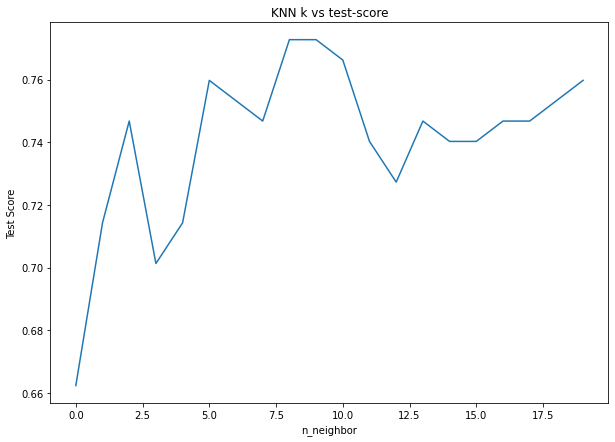

In [33]:
scores = []

for n in range(1, 40, 2):
    knn_model = KNeighborsClassifier(n_neighbors=n, metric='euclidean', p=2)
    knn_model.fit(train_x, train_y)
    pred = knn_model.predict(test_x)
    scores.append(knn_model.score(test_x, test_y))
    
plt.figure(figsize=(10, 7))
plt.plot(scores)
plt.xlabel('n_neighbor')
plt.ylabel('Test Score')
plt.title('KNN k vs test-score')
plt.show()

**BEST MODEL AT K=8**

In [39]:
clf_model(n_neighbors=9, p=2, metric='euclidean')

{'n_neighbors': 9,
 'p': 2,
 'metric': 'euclidean',
 'Train Score': 0.8029315960912052,
 'Test Score': 0.7142857142857143}

# Hyperparameter tuning using Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


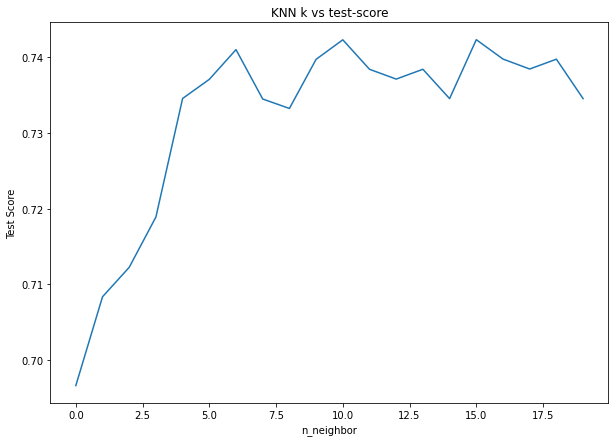

In [40]:
scores = []
errors = []

for n in range(1, 40, 2):
    knn_model = KNeighborsClassifier(n_neighbors=n, metric='euclidean', p=2)
    scr = cross_val_score(knn_model, X, y, cv=10)
    scores.append(np.mean(scr))
    errors.append(1-np.mean(scr))
#     knn_model.fit(train_x, train_y)
#     pred = knn_model.predict(test_x)
#     scores.append(knn_model.score(test_x, test_y))
    
plt.figure(figsize=(10, 7))
plt.plot(scores)
plt.xlabel('n_neighbor')
plt.ylabel('Test Score')
plt.title('KNN k vs test-score')
plt.show();

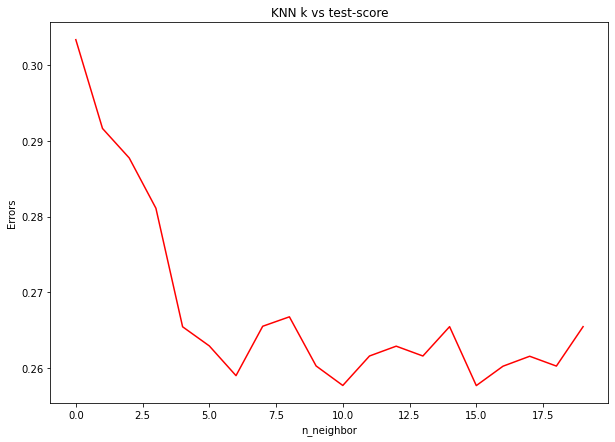

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(errors, 'r')
plt.xlabel('n_neighbor')
plt.ylabel('Errors')
plt.title('KNN k vs test-score')
plt.show()

**BEST MODEL AT K=15**

In [41]:
clf_model(n_neighbors=15, p=2, metric='euclidean')

{'n_neighbors': 15,
 'p': 2,
 'metric': 'euclidean',
 'Train Score': 0.7817589576547231,
 'Test Score': 0.7467532467532467}